In [68]:
import os
import re
import glob

print(os.getcwd())

def get_info(file):
    prediction_rate=1   # for perfect condition
    speedup = 0
    cpi = 0
    lines = open(file).readlines()
    for line in lines:
        if line.find('bpred_dir_rate') > 0:
            prediction_rate = float(re.findall(r'0+\.\d+', line)[0])
            # print(prediction_rate)
        if line.find('sim_CPI') == 0:
            cpi = float(re.findall(r'\d+\.\d+', line)[0])
            # print(cpi)
    return prediction_rate,cpi

app_name_list=[
    "dijkstra_small",
    "stringsearch-cabce", 
    "qsort_small", 
    "gsm-untoast", 
    "jpeg-cjpeg"
    ]

predictor_list = glob.glob("./simhome/configs/task_1/*")
predictor_list.sort(reverse=True)
# print(predictor_list)
csv=open("task_1.csv",'w')
app_perf_map={}
app_perf_cpi_map={}
print("app,"+",".join([p.split("/")[-1] for p in predictor_list]), file=csv)
for app in app_name_list:
    print(app,end=',', file=csv)
    rate_list=[]
    cpi_list=[]
    for predictor in predictor_list:
        stat_file_path = os.path.join(predictor, "Stats_"+ app + ".txt")
        rate,cpi = get_info(stat_file_path)
        print(rate, end=',', file=csv)
        rate_list.append(rate)
        cpi_list.append(cpi)
    print("", file=csv)
    app_perf_map[app] = rate_list
    app_perf_cpi_map[app] = cpi_list

for app in app_name_list:
    print(app,":",app_perf_map[app])
    print(app,":",app_perf_cpi_map[app])

/home/hal/DAT105/Lab_2
dijkstra_small : [1, 0.3894, 0.993, 0.993, 0.9904, 0.9904, 0.9871, 0.8326, 0.9906, 0.988]
dijkstra_small : [8.0701, 8.8238, 7.4996, 7.4996, 7.5022, 7.5022, 7.503, 7.7053, 7.5007, 7.502]
stringsearch-cabce : [1, 0.28, 0.9535, 0.9535, 0.9335, 0.9334, 0.9293, 0.9101, 0.9426, 0.9237]
stringsearch-cabce : [18.2402, 18.4604, 17.0565, 17.0565, 17.0915, 17.0915, 17.1164, 17.2461, 17.0536, 17.0628]
qsort_small : [1, 0.3153, 0.9747, 0.9747, 0.9336, 0.9336, 0.9688, 0.948, 0.9716, 0.9607]
qsort_small : [14.2241, 15.1891, 12.4089, 12.4089, 12.8858, 12.8858, 12.4086, 12.4211, 12.4067, 12.4121]
gsm-untoast : [1, 0.2087, 0.9862, 0.9862, 0.9853, 0.9852, 0.9847, 0.9726, 0.9859, 0.9734]
gsm-untoast : [2.7324, 3.3774, 2.735, 2.7349, 2.7332, 2.7333, 2.7356, 2.7417, 2.7352, 2.7386]
jpeg-cjpeg : [1, 0.1819, 0.9415, 0.9415, 0.9374, 0.9372, 0.9333, 0.9228, 0.9407, 0.9335]
jpeg-cjpeg : [5.5951, 5.9808, 5.1776, 5.1776, 5.1738, 5.1741, 5.1897, 5.2001, 5.1822, 5.187]


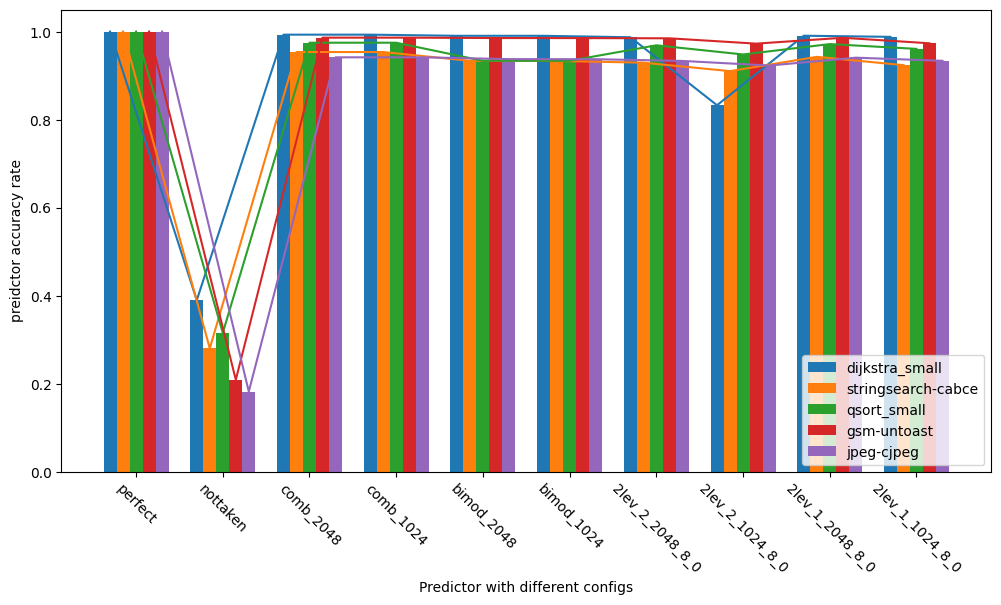

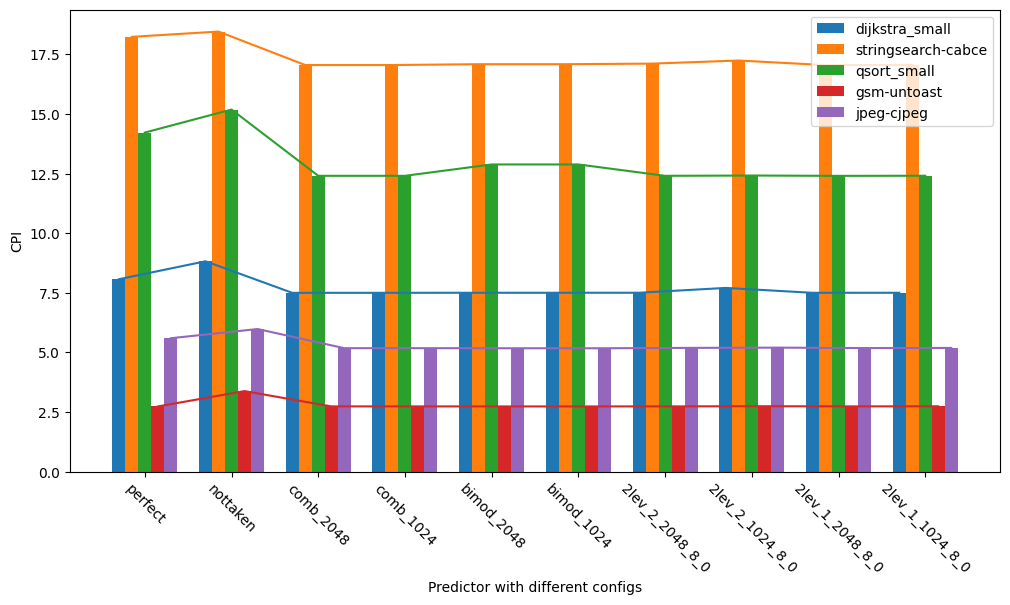

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

predictor = [p.split("/")[-1] for p in predictor_list]
def mplot(mdata, y_label, x_label='Predictor with different configs'):
  plt.figure(figsize=(12, 6))

  bar_width = 0.15
  x = np.arange(len(predictor))

  plt.bar(x - 2 * bar_width , mdata["dijkstra_small"], bar_width, label='dijkstra_small')
  plt.plot(x- 2 * bar_width, mdata["dijkstra_small"])

  plt.bar(x - 1 * bar_width , mdata["stringsearch-cabce"], bar_width, label='stringsearch-cabce')
  plt.plot(x- 1 * bar_width, mdata["stringsearch-cabce"])

  plt.bar(x - 0 * bar_width , mdata["qsort_small"], bar_width, label='qsort_small')
  plt.plot(x- 0 * bar_width, mdata["qsort_small"])

  plt.bar(x + 1 * bar_width , mdata["gsm-untoast"], bar_width, label='gsm-untoast')
  plt.plot(x+ 1 * bar_width, mdata["gsm-untoast"])

  plt.bar(x + 2 * bar_width , mdata["jpeg-cjpeg"], bar_width, label='jpeg-cjpeg')
  plt.plot(x+ 2 * bar_width, mdata["jpeg-cjpeg"])

  plt.xticks(rotation=-45)

  plt.title("")
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.xticks(x, predictor)

  plt.legend()

mplot(app_perf_map, "preidctor accuracy rate")
mplot(app_perf_cpi_map, "CPI")
